<a href="https://www.kaggle.com/code/oilgas101/us-accidents-eda?scriptVersionId=96277099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


In [2]:
##US Accidents Exploratory Analysis

#1. Data preparattion and cleaning
    # a. Load the file 
df= pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [3]:
numerics = ["int16","int32","int64","float16","float32","float64"]
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

14

In [4]:
Missing_data_count = df.isna().sum().sort_values(ascending = False)
row_counts = len(df)

Percentage_missing_data = (Missing_data_count / row_counts) * 100
print(Percentage_missing_data)

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

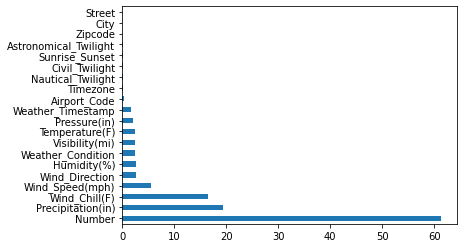

In [5]:
missing = Percentage_missing_data[Percentage_missing_data !=0]
missing.plot(kind = 'barh')

In [6]:
#column to explore 1. City,2. Temp, 3. Start time,4.Start lat& log, 5.Weather condition
cities = df.City.unique()
len(cities)

11682

In [7]:
cities_by_accident = df.City.value_counts()
states_by_accident = df.State.value_counts()
states_by_accident
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [8]:
"NY" in df.State

False

<AxesSubplot:>

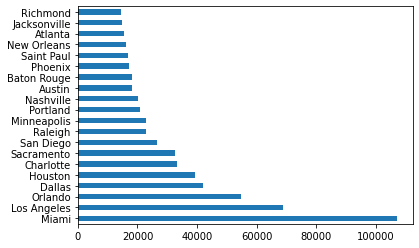

In [9]:
cities_by_accident[:20].plot(kind= 'barh')

<AxesSubplot:>

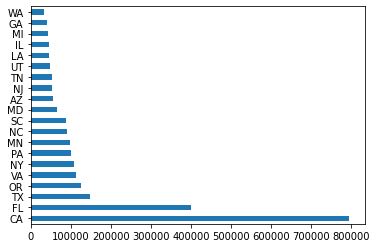

In [10]:
states_by_accident[:20].plot(kind = 'barh')

<AxesSubplot:xlabel='State', ylabel='Count'>

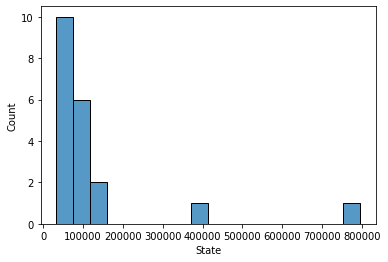

In [11]:
import seaborn as sns
sns.histplot(states_by_accident[:20])

In [12]:
#Categorize the accident rate in cities
hi_accident_cities = cities_by_accident[cities_by_accident>20000]
lo_accident_cities = cities_by_accident[cities_by_accident<1000]

In [13]:
cities_by_accident[cities_by_accident<10]

Brimfield                       9
Huntertown                      9
Vidalia                         9
Sunburst                        9
Steamboat Rock                  9
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 4428, dtype: int64

In [14]:
##Start Time
df.Start_Time[0]
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

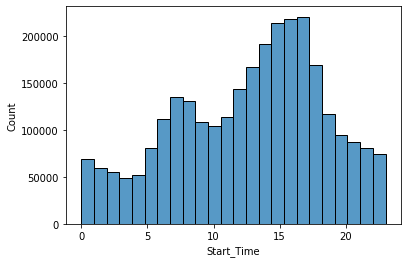

In [15]:
sns.histplot(df.Start_Time.dt.hour, bins = 24)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

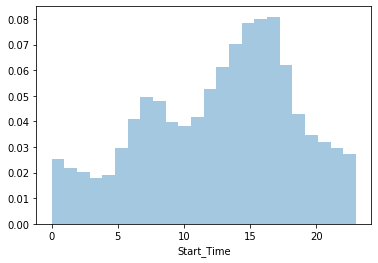

In [16]:
sns.distplot(df.Start_Time.dt.hour, bins = 24,kde=False,norm_hist = True)

<AxesSubplot:xlabel='Start_Time'>

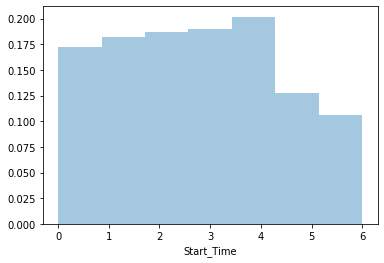

In [17]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7,kde=False,norm_hist = True)
#Monday is 0

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

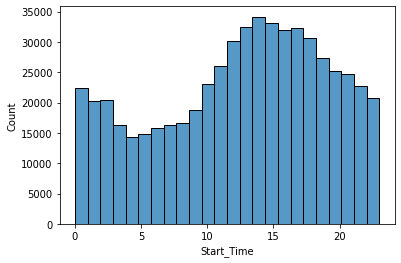

In [18]:
weekend_accident = df.Start_Time[df.Start_Time.dt.dayofweek >= 5]
sns.histplot(weekend_accident.dt.hour, bins = 24)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

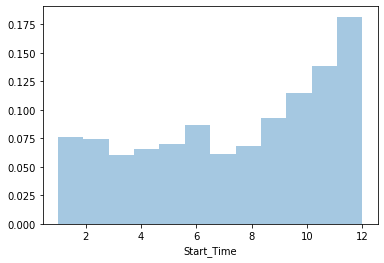

In [19]:
sns.distplot(df.Start_Time.dt.month, bins = 12,kde=False,norm_hist = True)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

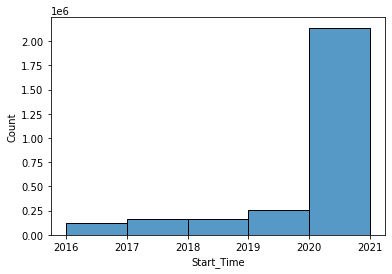

In [20]:
df_year = df.Start_Time.dt.year
sns.histplot(df_year, bins = 5)

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

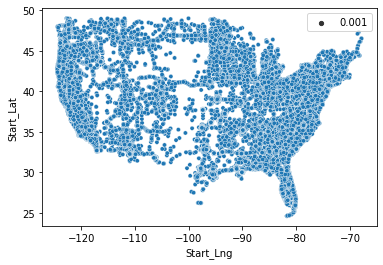

In [21]:
Lat = df.Start_Lat
Lng = df.Start_Lng
sample_df = df.sample(int(0.1* len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

In [22]:
#create heat map
import folium
from folium.plugins import HeatMap
sample_df = df.sample(int(0.001* len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map